<a href="https://colab.research.google.com/github/Hemant9785/deep-learning-/blob/main/mosquito_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:


df = pd.read_excel('/content/Mosquito_EXP.xlsx')

In [7]:
df.shape

(1678, 11)

In [8]:
df.iloc[0:5]

,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8,Temp,Humidity,Gas
0,31,88,65,96,65,96,88,31,31.4,45.8,Fresh Air
1,40,159,210,176,213,176,158,40,31.4,45.7,Fresh Air
2,41,185,355,223,357,223,183,41,31.4,45.6,Fresh Air
3,41,192,459,249,460,249,189,41,31.5,45.7,Fresh Air
4,41,196,516,266,518,265,194,41,31.5,44.5,Fresh Air


In [10]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MQ2       1678 non-null   int64  
 1   MQ3       1678 non-null   int64  
 2   MQ4       1678 non-null   int64  
 3   MQ7       1678 non-null   int64  
 4   MQ9       1678 non-null   int64  
 5   MQ135     1678 non-null   int64  
 6   MQ6       1678 non-null   int64  
 7   MQ8       1678 non-null   int64  
 8   Temp      1678 non-null   float64
 9   Humidity  1678 non-null   float64
 10  Gas       1678 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 144.3+ KB


In [11]:
df['Gas'].value_counts()

Liquid            342
Incense Sticks    340
Hit               317
Fast Card         264
EGG TRAY          178
Fresh Air         148
Coil               89
Name: Gas, dtype: int64

In [12]:
X = df.drop(['Gas'], axis=1)

y = df['Gas']

In [24]:
from sklearn import preprocessing
lc = preprocessing.LabelEncoder()
y = lc.fit_transform(df['Gas'])

y = pd.DataFrame(y,columns=['Gas'])
X  = X

In [25]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [26]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

<ipython-input-26-93f98cb707a3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Model accuracy score with 10 decision-trees : 0.8750


In [27]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

<ipython-input-27-56c2b533b5c9>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_100.fit(X_train, y_train)


Model accuracy score with 100 decision-trees : 0.8750


In [28]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

<ipython-input-28-49f674afeb2d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Text(95.72222222222221, 0.5, 'Truth')

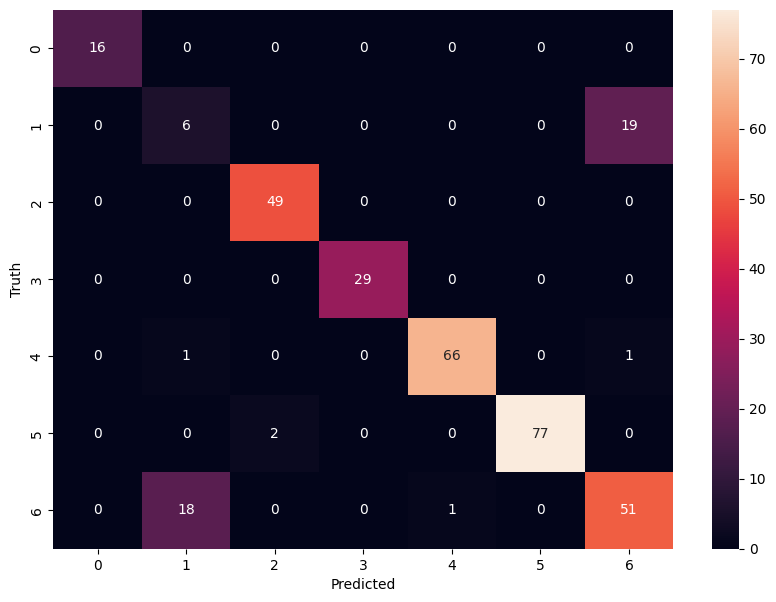

In [30]:
# confusion matrix
import matplotlib.pyplot as plt

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='micro')
# (0.33..., 0.33..., 0.33..., None)


(0.875, 0.875, 0.875, None)